<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 7</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago<p>
</div>

https://medium.com/@soulawalid/python-autoviz-data-exploration-made-it-easy-475a9646630f

https://pypi.org/project/autoviz/#examples

Documentacion de librerias :
- https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html
- https://pypi.org/project/autoviz/
- https://pypi.org/project/sweetviz/
- https://tsfresh.readthedocs.io/en/latest/text/quick_start.html

In [ ]:
# Se instalan las librerías
!pip install h2o  # plataforma de AutoML que permite entrenar modelos avanzados de machine learning.
!pip install autoviz # AutoViz es una herramienta de visualizacion automatica de datos.
!pip install sweetviz #  genera reportes detallados de datasets
!pip install tsfresh #  extraer cientos de caracteristicas de las series de forma automatizada
# !pip install seaborn

# !pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=bcb82669bcd69187408b1fd930e9d89b29eb7f4752cf673e7ec98d6379772637
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install ydata-profiling # genera informes exploratorios automaticos



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1391e9f3200fdf9f382ad1a825060ca74db869589fdf2828f0a13f91f377534b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      

In [ ]:
# Se cargan las librerías
from pandas import DataFrame
from pandas import concat
import random
from scipy import stats
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML
import gc
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz
from IPython.display import YouTubeVideo
from tsfresh import extract_features
import statsmodels.api as sm
#from darts import TimeSeries
#from darts.models import (NaiveSeasonal,NaiveDrift,RNNModel,Prophet,ExponentialSmoothing,ARIMA,AutoARIMA,TCNModel,TransformerModel,Theta,FFT)
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
from ydata_profiling import ProfileReport # se utiliza para generar informes exploratorios completos de un dataframe de pandas.



In [ ]:
#!pip install pyforest
#from pyforest import *

En este [link](https://github.com/MaxBenChrist/awesome_time_series_in_python) encontrarán librerías útiles para series de tiempo

# Ejemplo Dataset "Contaminación"

Esta base de datos informa sobre el clima y el nivel de contaminación cada hora durante cinco años en la embajada de Estados Unidos ubicada en Beijing, China.  

El PM2.5 se refiere a la materia particulada atmosférica (PM µg/m3), la cual tiene una diámetro menor a 2.5 micrómetros, equivalente a aproximadamente un 3% del diámetro de un pelo humano.  Las partículas son tan pequeñas que comúnmente solo son medibles a través de microscopios de electrónicos.

Estas partículas finas provienen de diversas fuentes. Desde polvo de plantas, vehículos de motor, aviones, incendios forestales, tormentas de arena, quema agropecuaria y de agricultura, entre otros.

**¿Por qué el PM2.5 es Peligroso?**  
Debido a que son partículas tan ligeras y tan pequeñas, estas tienden a permanecer más tiempo en el aire al compararlas con otras más pesadas.  Lo anterior incrementa la probabilidad de que estas partículas sean inhaladas por personas o animales. Partículas de este tamaño, pueden entrar por la nariz, pasar por la garganta y penetrar de forma profunda en los pulmones; algunas incluso pueden llegar hasta el sistema circulatorio.  

El muestreo de aire es cualquier método para tomar un volumen representativo de aire y analizar su contaminación química, de partículas o radioactiva.  Las muestras se recolectan al vacío en un filtro o resina, se procesan más mediante limpieza del filtro, extracción o incineración, y luego se evalúan utilizando métodos gravimétricos, microscopía o equipo.

**Variables:**
*   date: fecha y hora
*   pollution: concentración de PM2.5 (Contaminación)
*   dew: punto de rocío
*   temp: temperatura
*   press: Presión
*   wnd_dir: dirección del viento
*   wnd_spd: velocidad del viento acumulada
*   snow: horas acumuladas de nieve
*   rain: horas acumuladas de lluvia




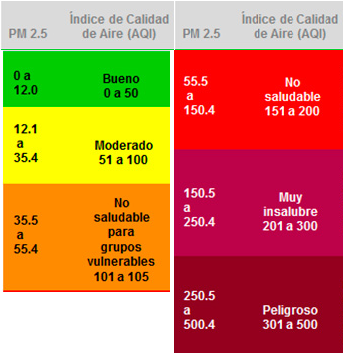

## **Análisis Exploratorio**

In [ ]:
# Se carga la base
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/pollution.csv'
df = pd.read_csv(url,index_col=0,parse_dates=True)
df.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00    129.0   -16   -4.0  1020.0    SE     1.79      0     0 
2010-01-02 01:00:00    148.0   -15   -4.0  1020.0    SE     2.68      0     0 
2010-01-02 02:00:00    159.0   -11   -5.0  1021.0    SE     3.57      0     0 
2010-01-02 03:00:00    181.0    -7   -5.0  1022.0    SE     5.36      1     0 
2010-01-02 04:00:00    138.0    -7   -5.0  1022.0    SE     6.25      2     0

In [ ]:
# Analisis exploratorio general
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
# Análisis exploratorio por variable
df.describe()

pollution        dew          temp          press        wnd_spd    \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

           snow          rain      
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

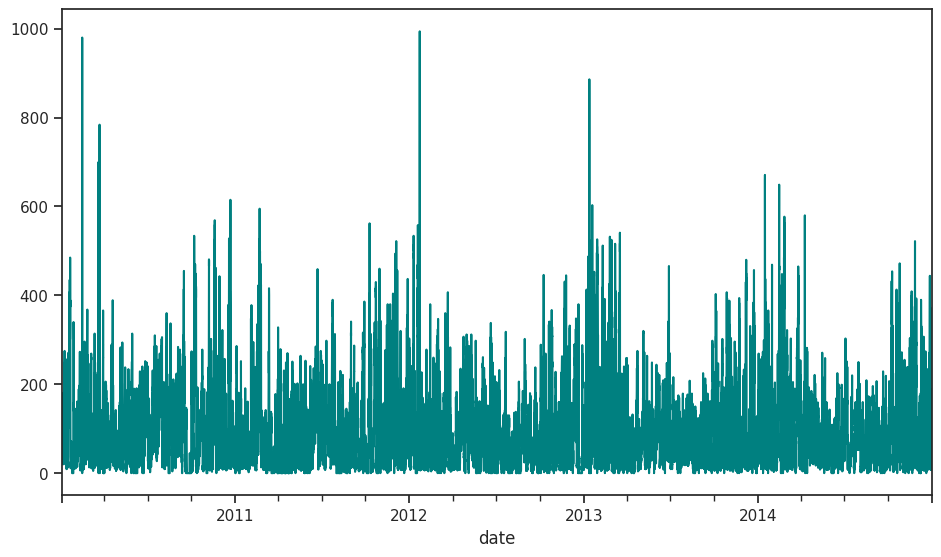

In [ ]:
# Se grafica la contaminación
ax= df['pollution'].plot(label='Contaminación', color='teal', figsize=(10, 6));

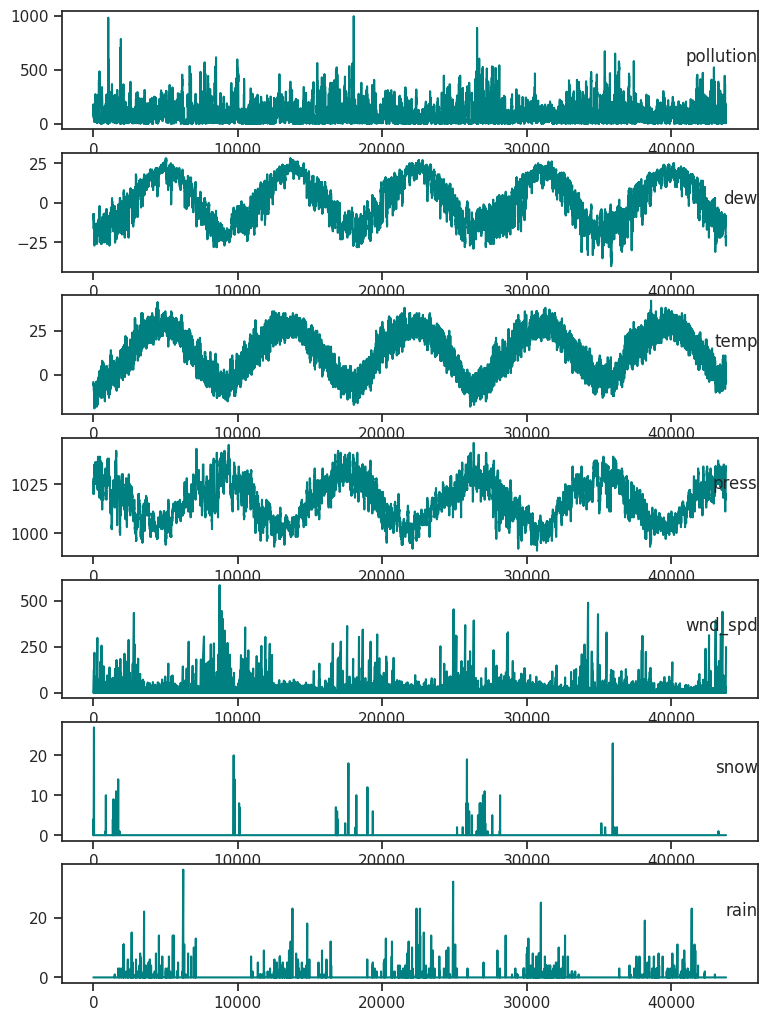

In [ ]:
# Grafico de la evolucion de todas las variables
plt.figure(figsize=(8, 12))
values = df.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group],color='teal')
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

Autoviz, es una herramienta que facilita la explotacion de datos. Su objetivo principal es simplificar y acelerar el proceso de analisis y visualizacion de datos sin necesidad de escribir mucho codigo.

Caracteristicas principales=
- Visualizacion automatica
- Analisis exploratorio de datos ( EDA ) detectando relaciones, patrones y posibles problemas en los datos
- Detecta variables atipicas y datos faltantes
- Interfaz sencilla

In [ ]:
# Análisis exploratorio automático (gráfico) - Guardo tb los resultados en formato "HTML"

AV = AutoViz_Class()

# dataset = AV.AutoViz(filename="", dfte=df, depVar="pollution")
dataset = AV.AutoViz(url, depVar="pollution",verbose=2,chart_format='html')

Shape of your Data Set loaded: (43800, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['temp', 'press', 'wnd_spd']
    Integer-Categorical Columns: ['dew', 'snow', 'rain']
    String-Categorical Columns: ['wnd_dir']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['date']
    Columns that will not be considered in modeling: []
    8 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['date']

################ Regression problem #

Saving scatterplots in HTML format


Saving pair_scatters in HTML format


Saving distplots_cats in HTML format


Saving distplots_nums in HTML format


Saving kde_plots in HTML format


Saving violinplots in HTML format


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                               

Time to run AutoViz (in seconds) = 46


In [ ]:
# Si queremos ver los problemas de calidad de los datos. Hace un analisis rapido de calidad de datos antes de iniciar el preprocesamiento.
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df)

There are 14 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


Data Type  Missing Values% Unique Values% Minimum Value  \
pollution   float64        0.0             NA              0.0      
dew           int64        0.0              0            -40.0      
temp        float64        0.0             NA            -19.0      
press       float64        0.0             NA            991.0      
wnd_dir      object        0.0              0                       
wnd_spd     float64        0.0             NA             0.45      
snow          int64        0.0              0              0.0      
rain          int64        0.0              0              0.0      

          Maximum Value  \
pollution      994.0      
dew             28.0      
temp            42.0      
press         1046.0      
wnd_dir                   
wnd_spd        585.6      
snow            27.0      
rain            36.0      

                                                                  DQ Issue                                                          
pollution  Column has 1835 outliers greater than upper bound (296.50) or lower than lower bound(-139.50). Cap them or remove them.  
dew                                                    Column has a high correlation with ['temp']. Consider dropping one of them.  
temp                                                                                                                      No issue  
press                                                  Column has a high correlation with ['temp']. Consider dropping one of them.  
wnd_dir                                                                                                                   No issue  
wnd_spd      Column has 5101 outliers greater than upper bound (52.09) or lower than lower bound(-28.39). Cap them or remove them.  
snow             Column has 368 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.  
rain            Column has 1808 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.

In [ ]:
# Si queremos una solucion rapida podemos correr este codigo =

'''
Se ve el DataFrame en busca de problemas como:
Valores faltantes: Imputa o elimina .
Valores duplicados: Elimina o resuelve duplicados.
Tipos de datos incorrectos: Cambia tipos de datos inapropiados para asegurarse de que cada columna tenga el tipo adecuado para el analisis.
Outliers: Puede identificar y tratar valores extremos.

'''

from autoviz import FixDQ
fixdq = FixDQ()

df_copy=df.copy()

fixdq.fit_transform(df_copy)

Alert: Detecting 14 duplicate rows...
Alert: Dropping 14 duplicate rows can sometimes cause column data types to change to object. Double-check!


pollution  dew  temp   press wnd_dir   wnd_spd  snow  \
date                                                                        
2010-01-02 00:00:00  0.674333  -16   -4.0  1020.0    SE    1.026042    0    
2010-01-02 01:00:00  0.827039  -15   -4.0  1020.0    SE    1.302913    0    
2010-01-02 02:00:00  0.909235  -11   -5.0  1021.0    SE    1.519513    0    
2010-01-02 03:00:00  1.062338   -7   -5.0  1022.0    SE    1.850028    1    
2010-01-02 04:00:00  0.748505   -7   -5.0  1022.0    SE    1.981001    2    
...                        ...  ...   ...     ...     ...       ...   ...   
2014-12-31 19:00:00 -1.357450  -23   -2.0  1034.0    NW    4.752857    0    
2014-12-31 20:00:00 -1.253794  -22   -3.0  1034.0    NW    4.752857    0    
2014-12-31 21:00:00 -1.253794  -22   -3.0  1034.0    NW    4.752857    0    
2014-12-31 22:00:00 -1.357450  -22   -4.0  1034.0    NW    4.752857    0    
2014-12-31 23:00:00 -1.162728  -21   -3.0  1034.0    NW    4.752857    0    

                     rain  
date                       
2010-01-02 00:00:00    0   
2010-01-02 01:00:00    0   
2010-01-02 02:00:00    0   
2010-01-02 03:00:00    0   
2010-01-02 04:00:00    0   
...                   ...  
2014-12-31 19:00:00    0   
2014-12-31 20:00:00    0   
2014-12-31 21:00:00    0   
2014-12-31 22:00:00    0   
2014-12-31 23:00:00    0   

[43786 rows x 8 columns]

Pandas Profiling, es un modulo donde se puede hacer rapido analisis y explotacion de datos con unas solas lineas de codigo.

In [ ]:
# Análisis Exploratorio Automático 1 - AutoEDA - Pandas Profiling
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)  # modo mínimo ---> Minimal = True

In [ ]:
# Al costado vemos el archivo
profile.to_file("EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

Sweetviz es una biblioteca de Python diseñada para facilitar la exploracion y el analisis de datos

In [ ]:
my_report = sweetviz.analyze([pd.read_csv(url),'Dataset'],target_feat="pollution")

'''
my_report tiene estadisticas descriptivas, visualizaciones y analisis de correlacion, asi vemos patrones, valores atipicos y relaciones dentro del dataset.
'''

                                             |          | [  0%]   00:00 -> (? left)

'\nmy_report tiene estadisticas descriptivas, visualizaciones y analisis de correlacion, asi vemos patrones, valores atipicos y relaciones dentro del dataset.\n'

In [ ]:
# Generación del reporte html en el costado
my_report.show_html("Report_Sweetviz.html")

Report Report_Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from google.colab import files

# Descarga el archivo generado previamente
files.download("Report_Sweetviz.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

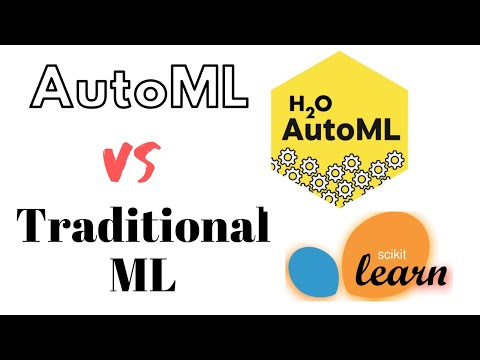

In [ ]:
# Breve introduccion a AutoML
YouTubeVideo('YA_dYTNa9tc')
# https://www.youtube.com/watch?v=YA_dYTNa9tc

![picture](https://www.ericsson.com/4a949f/assets/global/qbank/2020/10/14/machine-learning-workflow-124321d41d8cd98f00b204e9800998ecf8427e.png?w=1410)

[Fuente del Ejemplo](https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/h2o_automl_example_with_multivariate_time_series.ipynb)

Para modelar la serie temporal con métodos tradicionales de aprendizaje supervisado, se deben pre-procesar los datos. Creamos las variables lagueadas mediante la función [time_series_to_supervised](https://machinelearningmastery.com/.convert-time-series-supervised-learning-problem-python/). La función tiene los siguientes parámetros:


*   data = dataframe
*   n_lags = lags pasados
*   n_fut = lags futuros
*   selLag = selecciona una variable específica del lag pasado
*   selFut = selecciona una variable específica del lag futuro
*   dropnan = borra las líneas con NaN

In [ ]:
def time_series_to_supervised(data, n_lag=1, n_fut=1, selLag=None, selFut=None, dropnan=True):
    """
    Convierte una serie temporal en un conjunto de datos de aprendizaje supervisado agregando un período anterior y futuro diferido en el tiempo.
    datos como columnas de entrada o salida (es decir, resultado objetivo) para cada período
    :param data:  una serie de atributos periódicos como una lista o NumPy array
    :param n_lag: número de períodos ANTERIORES que se retrasarán como entrada (X); genera: Xa(t-1), Xa(t-2); min= 0 --> nada retrasado
    :param n_fut: número de períodos FUTUROS para agregar como producción objetivo (y); genera You(t+1); min= 0 --> sin períodos futuros
    :param selLag:  copie únicamente estos atributos específicos del período ANTERIOR; predeterminado = Ninguno; EJ: ['Xa', 'Xb']
    :param selFut: copie únicamente estos atributos específicos del período FUTURO; predeterminado = Ninguno; EJ: ['rslt', 'xx']
    :param dropnan: True= borra filas con valoresNaN ; default= True
    :return: un Pandas DataFrame de datos de series temporales organizados para el aprendizaje supervisado
    NOTAS:
    (1) Los datos del período actual siempre se incluyen en la salida.
    (2) Se agrega un sufijo a los nombres de las columnas originales para indicar una referencia de tiempo relativa: por ejemplo, (t) es la corriente
        período; (t-2) es de dos períodos del pasado; (t+1) es del siguiente periodo
    (3) Esta es una extensión de la función series_to_supervised() de Jason Brownlee, personalizada para uso de IMF



    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    origNames = df.columns
    cols, names = list(), list()
    # incluir todos los atributos del período actual
    cols.append(df.shift(0))
    names += [('%s' % origNames[j]) for j in range(n_vars)]

    # retrasar cualquier atributo del período anterior (t-n_lag,...,t-1)
    n_lag = max(0, n_lag)  # forzar un número válido de períodos de retraso
    for i in range(n_lag, 0, -1):
        suffix= '(t-%d)' % i
        if (None == selLag):
            cols.append(df.shift(i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:
            for var in (selLag):
                cols.append(df[var].shift(i))
                names+= [('%s%s' % (var, suffix))]

    # incluir atributos de período futuro (t+1,...,t+n_fut)
    n_fut = max(n_fut, 0)  # forzar un número válido de períodos futuros para retroceder
    for i in range(1, n_fut + 1):
        suffix= '(t+%d)' % i
        if (None == selFut):  #
            cols.append(df.shift(-i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:  # copiar solo atributos futuros seleccionados
            for var in (selFut):
                cols.append(df[var].shift(-i))
                names += [('%s%s' % (var, suffix))]
    # combinar todo
    agg = concat(cols, axis=1)
    agg.columns = names
    # borra filas con valores NaN introducidos por el lagging
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [ ]:
# Se aplica la función time_series_to_supervised
df_processed = time_series_to_supervised(df, n_lag=1, n_fut=1 , selLag=None, selFut=['pollution'], dropnan=True)
df_processed.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  \
date                                                                       
2010-01-02 01:00:00    148.0   -15   -4.0  1020.0    SE     2.68      0    
2010-01-02 02:00:00    159.0   -11   -5.0  1021.0    SE     3.57      0    
2010-01-02 03:00:00    181.0    -7   -5.0  1022.0    SE     5.36      1    
2010-01-02 04:00:00    138.0    -7   -5.0  1022.0    SE     6.25      2    
2010-01-02 05:00:00    109.0    -7   -6.0  1022.0    SE     7.14      3    

                     rain  pollution(t-1)  dew(t-1)  temp(t-1)  press(t-1)  \
date                                                                         
2010-01-02 01:00:00    0        129.0       -16.0      -4.0       1020.0     
2010-01-02 02:00:00    0        148.0       -15.0      -4.0       1020.0     
2010-01-02 03:00:00    0        159.0       -11.0      -5.0       1021.0     
2010-01-02 04:00:00    0        181.0        -7.0      -5.0       1022.0     
2010-01-02 05:00:00    0        138.0        -7.0      -5.0       1022.0     

                    wnd_dir(t-1)  wnd_spd(t-1)  snow(t-1)  rain(t-1)  \
date                                                                   
2010-01-02 01:00:00      SE           1.79         0.0        0.0      
2010-01-02 02:00:00      SE           2.68         0.0        0.0      
2010-01-02 03:00:00      SE           3.57         0.0        0.0      
2010-01-02 04:00:00      SE           5.36         1.0        0.0      
2010-01-02 05:00:00      SE           6.25         2.0        0.0      

                     pollution(t+1)  
date                                 
2010-01-02 01:00:00       159.0      
2010-01-02 02:00:00       181.0      
2010-01-02 03:00:00       138.0      
2010-01-02 04:00:00       109.0      
2010-01-02 05:00:00       105.0

In [ ]:
# Separación en entrenamiento (80%) y testeo (20%)
df_processed.reset_index(drop=True,inplace=True) # reseteo el índice
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

In [ ]:
# Visualziación de la base de entrenamiento
df_train.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain  pollution(t-1)  \
0    148.0   -15   -4.0  1020.0    SE     2.68      0     0        129.0       
1    159.0   -11   -5.0  1021.0    SE     3.57      0     0        148.0       
2    181.0    -7   -5.0  1022.0    SE     5.36      1     0        159.0       
3    138.0    -7   -5.0  1022.0    SE     6.25      2     0        181.0       
4    109.0    -7   -6.0  1022.0    SE     7.14      3     0        138.0       

   dew(t-1)  temp(t-1)  press(t-1) wnd_dir(t-1)  wnd_spd(t-1)  snow(t-1)  \
0   -16.0      -4.0       1020.0        SE           1.79         0.0      
1   -15.0      -4.0       1020.0        SE           2.68         0.0      
2   -11.0      -5.0       1021.0        SE           3.57         0.0      
3    -7.0      -5.0       1022.0        SE           5.36         1.0      
4    -7.0      -5.0       1022.0        SE           6.25         2.0      

   rain(t-1)  pollution(t+1)  
0     0.0          159.0      
1     0.0          181.0      
2     0.0          138.0      
3     0.0          109.0      
4     0.0          105.0

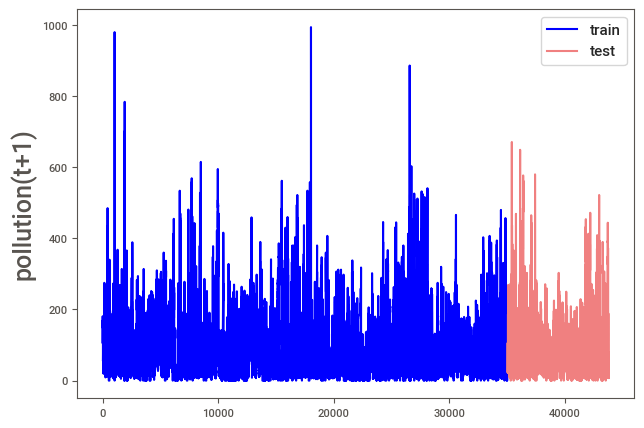

In [ ]:
# Se grafican las bases de entrenamiento y testeo juntas

%matplotlib inline

plt.plot(df_train.index,df_train['pollution(t+1)'],color='blue')
plt.plot(df_test.index,df_test['pollution(t+1)'],color='lightcoral')
plt.ylabel('pollution(t+1)',fontsize=18)
plt.legend(['train','test'])
plt.show()

Se utiliza la librería H2O para el modelado.

[Documentación de H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

[Breve Introducción a H2O](https://www.datacamp.com/community/tutorials/h2o-automl?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=s&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-763347114660:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=CjwKCAjwtpGGBhBJEiwAyRZX2ibtKYEghiaov8V72GeEZ5pd8KmeyWlT-IIdYtQxk4RfPE-7h4KQLBoCP8sQAvD_BwE)

In [ ]:
# Se inicializa la sesion
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2qcbvt9p
  JVM stdout: /tmp/tmp2qcbvt9p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2qcbvt9p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Información de la secion H2O:
   - `H2O_cluster_uptime: 04 secs`: Tiempo de actividad del clúster H2O.
   - `H2O_cluster_total_nodes: 1`: Número total de nodos en el clúster.
   - `H2O_cluster_free_memory: 3.170 Gb`: Memoria libre en el clúster.
   - `H2O_cluster_total_cores: 2`: Número total de núcleos en el clúster.
   - `H2O_cluster_allowed_cores: 2`: Número de núcleos permitidos para el clúster.
   - `H2O_connection_url: http://127.0.0.1:54321`: URL de conexión al clúster.
   - `Python_version: 3.10.12 final`: Versión de Python utilizada.


In [ ]:
# Se convierten los dataframe de pandas en h2o frames
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf_train.types

{'pollution': 'int',
 'dew': 'int',
 'temp': 'int',
 'press': 'real',
 'wnd_dir': 'enum',
 'wnd_spd': 'real',
 'snow': 'int',
 'rain': 'int',
 'pollution(t-1)': 'int',
 'dew(t-1)': 'int',
 'temp(t-1)': 'int',
 'press(t-1)': 'real',
 'wnd_dir(t-1)': 'enum',
 'wnd_spd(t-1)': 'real',
 'snow(t-1)': 'int',
 'rain(t-1)': 'int',
 'pollution(t+1)': 'int'}

In [ ]:
# Análisis exploratorio del h2o frame de entrenamiento
hf_train.describe()

Rows:35039
Cols:17

pollution          dew                 temp                press               wnd_dir    wnd_spd             snow                  rain                 pollution(t-1)     dew(t-1)            temp(t-1)           press(t-1)          wnd_dir(t-1)    wnd_spd(t-1)       snow(t-1)             rain(t-1)            pollution(t+1)
-------  -----------------  ------------------  ------------------  ------------------  ---------  ------------------  --------------------  -------------------  -----------------  ------------------  ------------------  ------------------  --------------  -----------------  --------------------  -------------------  -----------------
type     int                int                 int                 real                enum       real                int                   int                  int                int                 int                 real                enum            real               int                   int                  int
mins     0.0                -33.0               -19.0               991.0                          0.45                0.0                   0.0                  0.0                -33.0               -19.0               991.0                               0.45               0.0                   0.0                  0.0
mean     93.35837209966049  1.773109963183872   12.154370843916785  1016.3996404007004             24.963884528667965  0.057478809326750153  0.20988041896172863  93.36139730015174  1.773224121692951   12.154056908016868  1016.3998116384574                  24.96000656411427  0.057478809326750153  0.20988041896172863  93.35483318587804
maxs     994.0              28.0                41.0                1046.0                         585.6               27.0                  36.0                 994.0              28.0                41.0                1046.0                              585.6              27.0                  36.0                 994.0
sigma    91.90981126115078  14.494809359874703  12.306906922191068  10.386335259832615             51.316324996508314  0.7738490378684302    1.4899490055843665   91.90923984452935  14.494653624689587  12.30717870443259   10.38634515672728                   51.31294167537916  0.7738490378684302    1.4899490055843665   91.9100945289003
zeros    1946               636                 882                 0                              0                   34708                 33523                1946               636                 882                 0                                   0                  34708                 33523                1946
missing  0                  0                   0                   0                   0          0                   0                     0                    0                  0                   0                   0                   0               0                  0                     0                    0
0        148.0              -15.0               -4.0                1020.0              SE         2.68                0.0                   0.0                  129.0              -16.0               -4.0                1020.0              SE              1.79               0.0                   0.0                  159.0
1        159.0              -11.0               -5.0                1021.0              SE         3.57                0.0                   0.0                  148.0              -15.0               -4.0                1020.0              SE              2.68               0.0                   0.0                  181.0
2        181.0              -7.0                -5.0                1022.0              SE         5.36                1.0                   0.0                  159.0              -11.0               -5.0                1021.0              SE              3.57               0.0                   0.0                  138.0
3        138.0              -7.0                -5.0                1022.0

In [ ]:
# Se define el target y la base de entrenamiento

y = 'pollution(t+1)'
X = hf_train.columns
X.remove(y)

In [ ]:
# Configuración de los parámetros de entrenamiento
'''
max_models: n max de modelos que AutoML entrena
max_runtime_secs : si se alcanza este limite AutoML finaliza.
'''

aml = H2OAutoML(max_models=10, max_runtime_secs = 180,seed = 42, verbosity="info", exclude_algos=['StackedEnsemble']) # Se excluyeron los ensambles


In [ ]:
# Inicio del entrenamiento
aml.train(x = X,
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |
22:18:21.8: Project: AutoML_1_20241105_221820
22:18:21.11: 5-fold cross-validation will be used.
22:18:21.11: Setting stopping tolerance adaptively based on the training frame: 0.005342249270903391
22:18:21.11: Build control seed: 42
22:18:21.12: training frame: Frame key: AutoML_1_20241105_221820_training_Key_Frame__upload_bfcd04bcb9ed56cf9cc6bffac907458d.hex    cols: 17    rows: 35039  chunks: 1    size: 858412  checksum: 2695093165254559864
22:18:21.13: validation frame: NULL
22:18:21.13: leaderboard frame: Frame key: Key_Frame__upload_9903842ba866e8736e404c6185124a19.hex    cols: 17    rows: 8760  chunks: 1    size: 181444  checksum: 8421467697225063246
22:18:21.13: blending frame: NULL
22:18:21.13: response column: pollution(t+1)
22:18:21.13: fold column: null
22:18:21.14: weights column: null
22:18:21.55: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241105_221820


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    67                 67                          146039                 12           15           14.6418       45            215           168.463

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 588.3816790405673
RMSE: 24.25658011840431
MAE: 12.225868694406675
RMSLE: NaN
Mean Residual Deviance: 588.3816790405673

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 706.1248975447016
RMSE: 26.573010697786987
MAE: 13.38623353250302
RMSLE: NaN
Mean Residual Deviance: 706.1248975447016

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     13.3953   0.283968    13.2073       13.7768       13.6194       13.2331       13.1401
mean_residual_deviance  706.643   48.8167     652.553       782.137       694.154       721.046       683.326
mse                     706.643   48.8167     652.553       782.137       694.154       721.046       683.326
r2                      0.916335  0.00595647  0.922617      0.90701       0.917088      0.914998      0.919961
residual_deviance       706.643   48.8167     652.553       782.137       694.154       721.046       683.326
rmse                    26.5703   0.910386    25.5451       27.9667       26.3468       26.8523       26.1405
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-11-05 22:20:04  51.260 sec  0                  91.9088          69.0282         8447.22
    2024-11-05 22:20:05  52.406 sec  5                  58.5221          43.2642         3424.84
    2024-11-05 22:20:06  52.957 sec  10                 41.4959          29.3611         1721.91
    2024-11-05 22:20:06  53.348 sec  15                 32.5299          21.2606         1058.19
    2024-11-05 22:20:07  53.771 sec  20                 28.8159          17.3088         830.354
    2024-11-05 22:20:07  54.184 sec  25                 26.7403          14.8408         715.043
    2024-11-05 22:20:07  54.669 sec  30                 25.8738          13.6806         669.452
    2024-11-05 22:20:08  55.096 sec  35                 25.4066          13.0973         645.493
    2024-11-05 22:20:08  55.516 sec  40                 25.089           12.7473         629.457
    2024-11-05 22:20:09  55.971 sec  45                 24.8566          12.5547         617.849
    2024-11-05 22:20:09  56.427 sec  50                 24.6908          12.4355         609.635
    2024-11-05 22:20:10  56.876 sec  55                 24.5349          12.3536         601.961
    2024-11-05 22:20:10  57.283 sec  60                 24.4092          12.2856         595.808
    2024-11-05 22:20:10  57.706 sec  65                 24.294           12.2415         590.197
    2024-11-05 22:20:11  57.876 sec  67                 24.2566          12.2259         588.382

Variable Importances: 
variable        relative_importance    scaled_importance   

In [ ]:
# Listado de los modelos ganadores
lb = aml.leaderboard
lb

model_id                               rmse      mse      mae    rmsle    mean_residual_deviance
----------------------------------  -------  -------  -------  -------  ------------------------
GBM_1_AutoML_1_20241105_221820      23.5181  553.103  12.4141      nan                   553.103
GLM_1_AutoML_1_20241105_221820      24.176   584.48   13.0293      nan                   584.48
XGBoost_2_AutoML_1_20241105_221820  24.7471  612.418  13.2399      nan                   612.418
XGBoost_1_AutoML_1_20241105_221820  25.2709  638.618  14.3956      nan                   638.618
[4 rows x 6 columns]

El modelo ganador es un Gradient Boosting, se elije aquel modelo que tenga mejores medidas de precisión. Definición de las medidas de precisión:

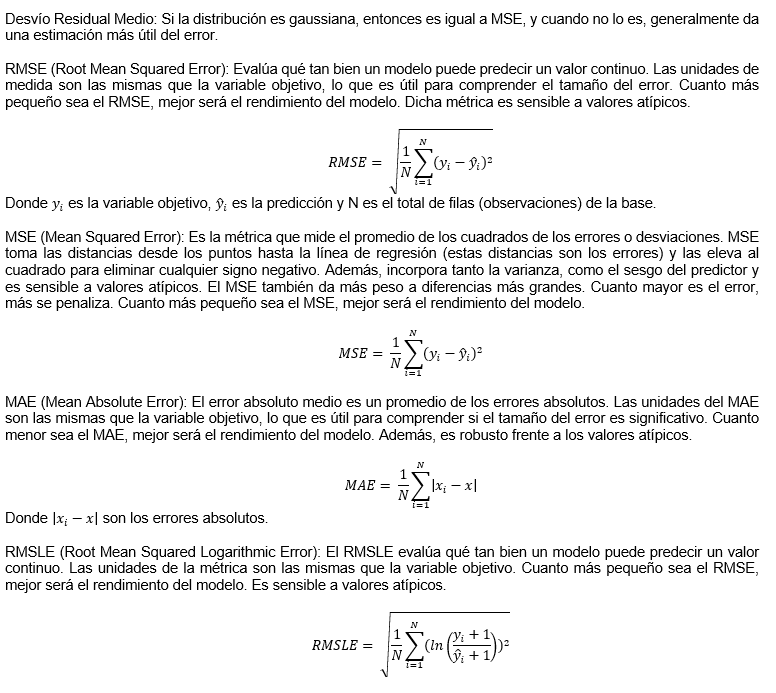

Info adicional de medidas de precisión: [link1](https://stats.stackexchange.com/questions/194453/interpreting-accuracy-results-for-an-arima-model-fit) [link2](https://www.youtube.com/watch?v=KzHJXdFJSIQ)

In [ ]:
# Se elige el modelo ganador
leader_model = aml.leader

In [ ]:
# Se realizan las predicciones en la base de testeo
hf_test_predict = leader_model.predict(hf_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Previsualización de las predicciones
hf_test_predict.head(5)

predict
---------
  21.8284
  23.58
  49.1138
  62.4314
  64.7809
[5 rows x 1 column]

In [ ]:
# Predicción vs Valores Reales
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['pollution(t+1)'].reset_index(drop=True) # valores reales
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True) # predicciones
df_results.head()

ground_truth  predictions
0      24.0       21.828431 
1      53.0       23.579972 
2      65.0       49.113820 
3      70.0       62.431382 
4      79.0       64.780879

In [ ]:
# Medidas de precisión
perf = aml.leader.model_performance(hf_test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 553.1028206956494
RMSE: 23.518138121366015
MAE: 12.414123982383224
RMSLE: NaN
Mean Residual Deviance: 553.1028206956494

In [ ]:
# Listado de modelos
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_1_AutoML_1_20241105_221820',
 'GLM_1_AutoML_1_20241105_221820',
 'XGBoost_2_AutoML_1_20241105_221820',
 'XGBoost_1_AutoML_1_20241105_221820']

**DRF** = Distributed Random Forest  
**GBM** = Gradient Boosting Machine   
**XRT** = Extremely randomized trees  
**GLM** = Generalized Linear Model

In [ ]:
# Modelo ganador
h2o.get_model([mid for mid in model_ids if "GBM_1" in mid][0])

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241105_221820


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    67                 67                          146039                 12           15           14.6418       45            215           168.463

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 588.3816790405673
RMSE: 24.25658011840431
MAE: 12.225868694406675
RMSLE: NaN
Mean Residual Deviance: 588.3816790405673

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 706.1248975447016
RMSE: 26.573010697786987
MAE: 13.38623353250302
RMSLE: NaN
Mean Residual Deviance: 706.1248975447016

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     13.3953   0.283968    13.2073       13.7768       13.6194       13.2331       13.1401
mean_residual_deviance  706.643   48.8167     652.553       782.137       694.154       721.046       683.326
mse                     706.643   48.8167     652.553       782.137       694.154       721.046       683.326
r2                      0.916335  0.00595647  0.922617      0.90701       0.917088      0.914998      0.919961
residual_deviance       706.643   48.8167     652.553       782.137       694.154       721.046       683.326
rmse                    26.5703   0.910386    25.5451       27.9667       26.3468       26.8523       26.1405
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-11-05 22:20:04  51.260 sec  0                  91.9088          69.0282         8447.22
    2024-11-05 22:20:05  52.406 sec  5                  58.5221          43.2642         3424.84
    2024-11-05 22:20:06  52.957 sec  10                 41.4959          29.3611         1721.91
    2024-11-05 22:20:06  53.348 sec  15                 32.5299          21.2606         1058.19
    2024-11-05 22:20:07  53.771 sec  20                 28.8159          17.3088         830.354
    2024-11-05 22:20:07  54.184 sec  25                 26.7403          14.8408         715.043
    2024-11-05 22:20:07  54.669 sec  30                 25.8738          13.6806         669.452
    2024-11-05 22:20:08  55.096 sec  35                 25.4066          13.0973         645.493
    2024-11-05 22:20:08  55.516 sec  40                 25.089           12.7473         629.457
    2024-11-05 22:20:09  55.971 sec  45                 24.8566          12.5547         617.849
    2024-11-05 22:20:09  56.427 sec  50                 24.6908          12.4355         609.635
    2024-11-05 22:20:10  56.876 sec  55                 24.5349          12.3536         601.961
    2024-11-05 22:20:10  57.283 sec  60                 24.4092          12.2856         595.808
    2024-11-05 22:20:10  57.706 sec  65                 24.294           12.2415         590.197
    2024-11-05 22:20:11  57.876 sec  67                 24.2566          12.2259         588.382

Variable Importances: 
variable        relative_importance    scaled_importance   

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "GBM_1" in mid][0])

In [ ]:
# Parámetros del modelo ganador
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_1_20241105_221820',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_1_20241105_221820'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241105_221820_training_Key_Frame__upload_bfcd04bcb9ed56cf9cc6bffac907458d.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241105_221820_training_Key_Frame__upload_bfcd04bcb9ed56cf9cc6bffac907458d.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241105_221820_training_Key_Frame__upload_bfcd04bcb9ed56cf9cc6bffac907458d.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241105_221820_training_Key_Frame__upload_bfcd04bcb9ed

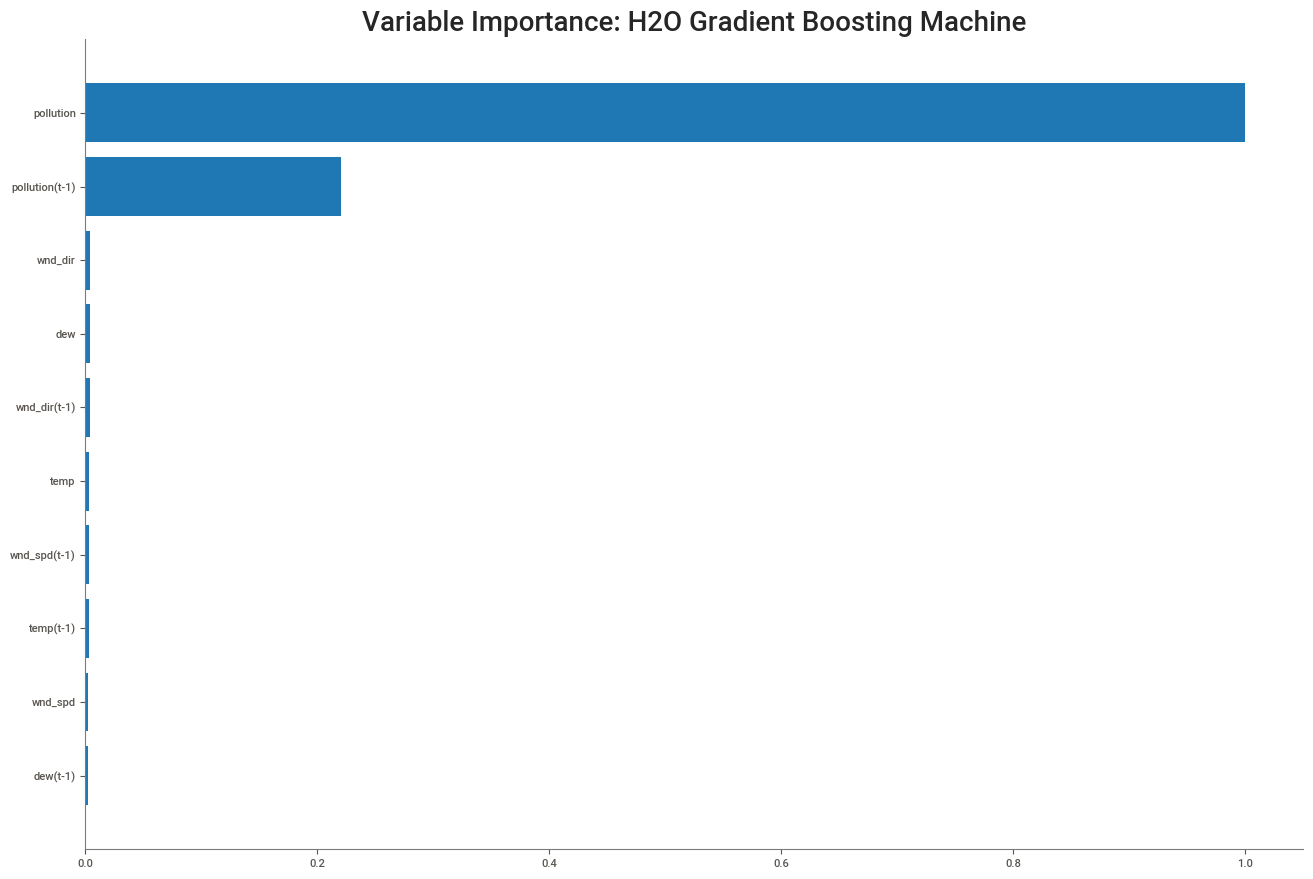

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()

https://shap.readthedocs.io/en/latest/index.html --> documentacion Shap

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

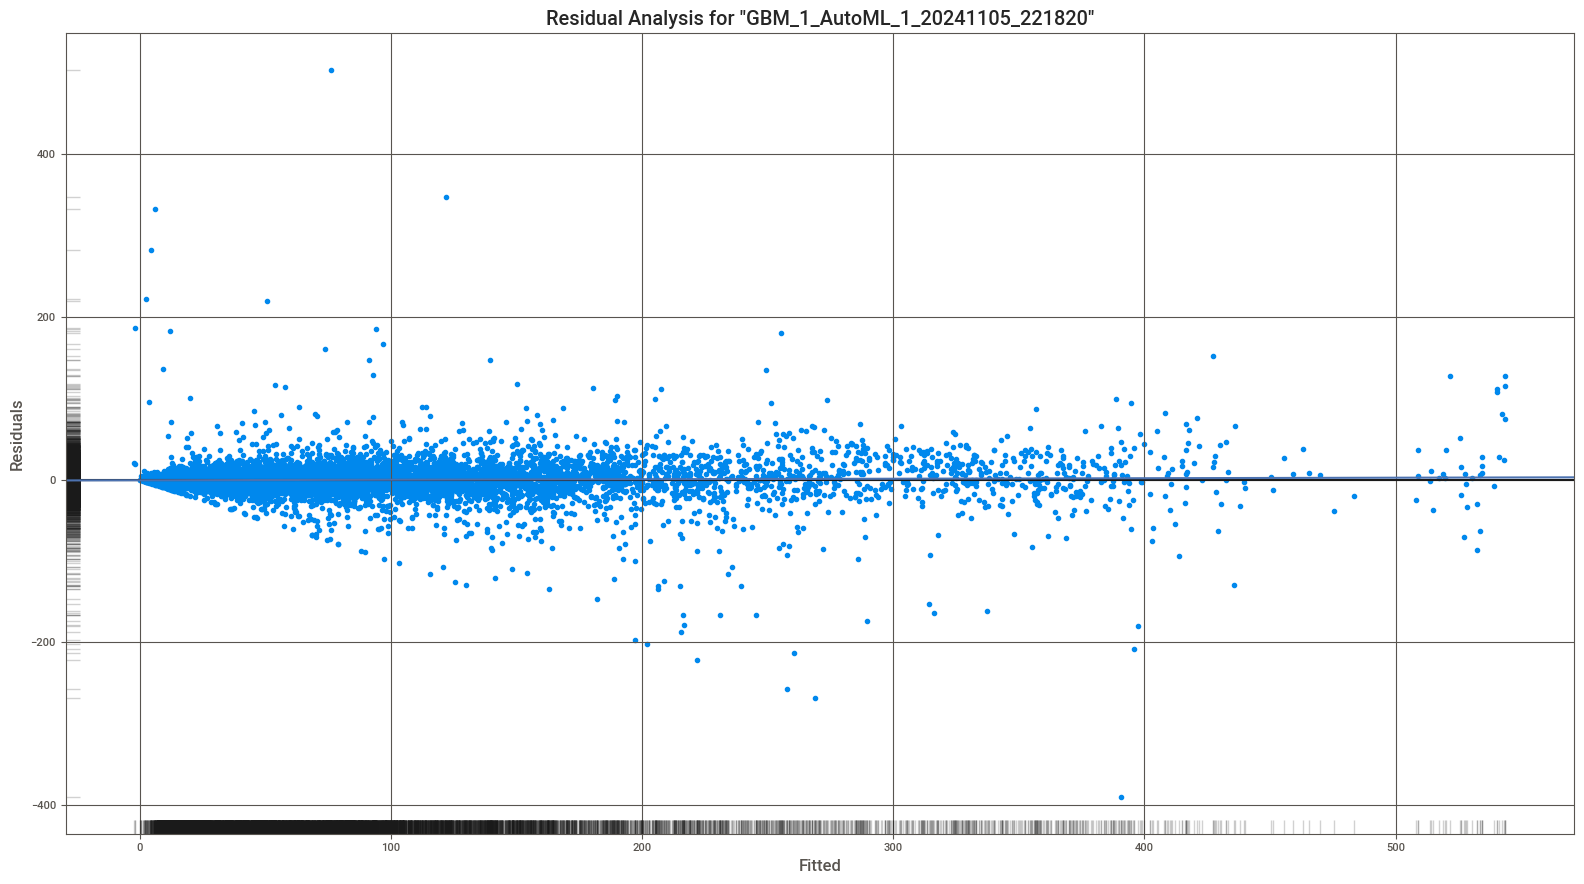

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

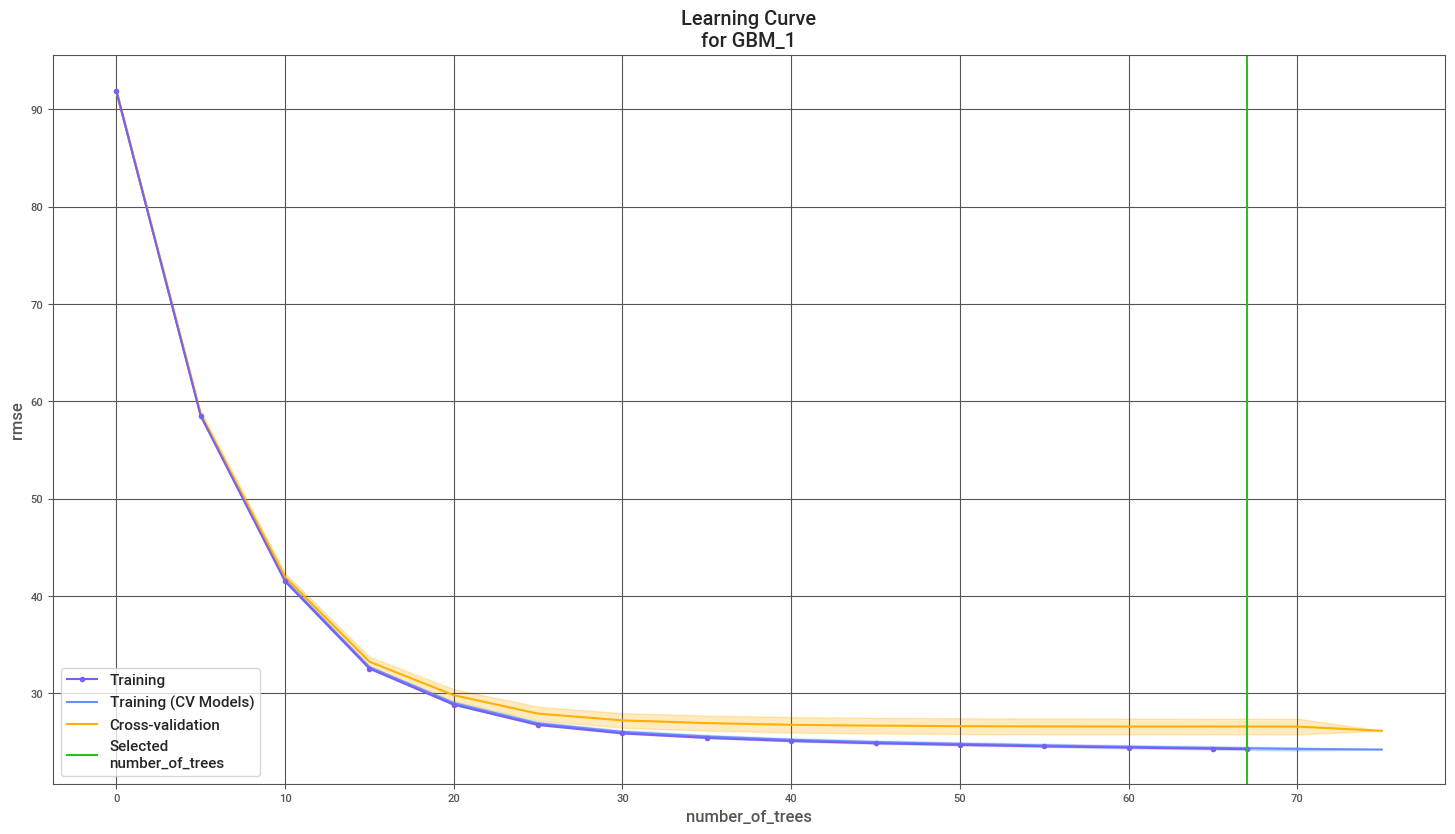

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

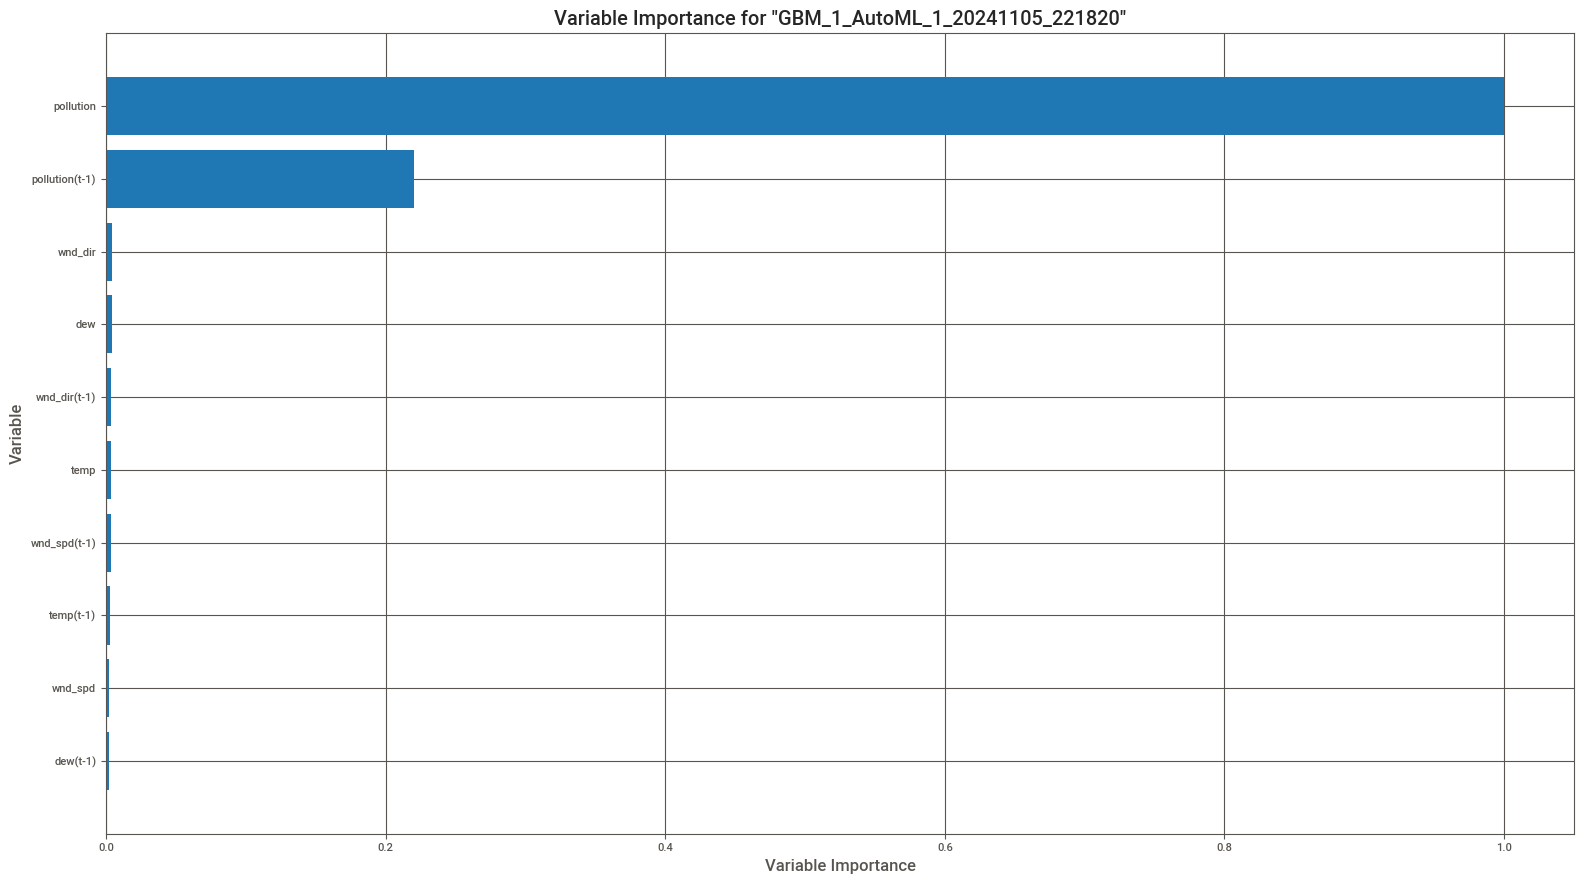

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

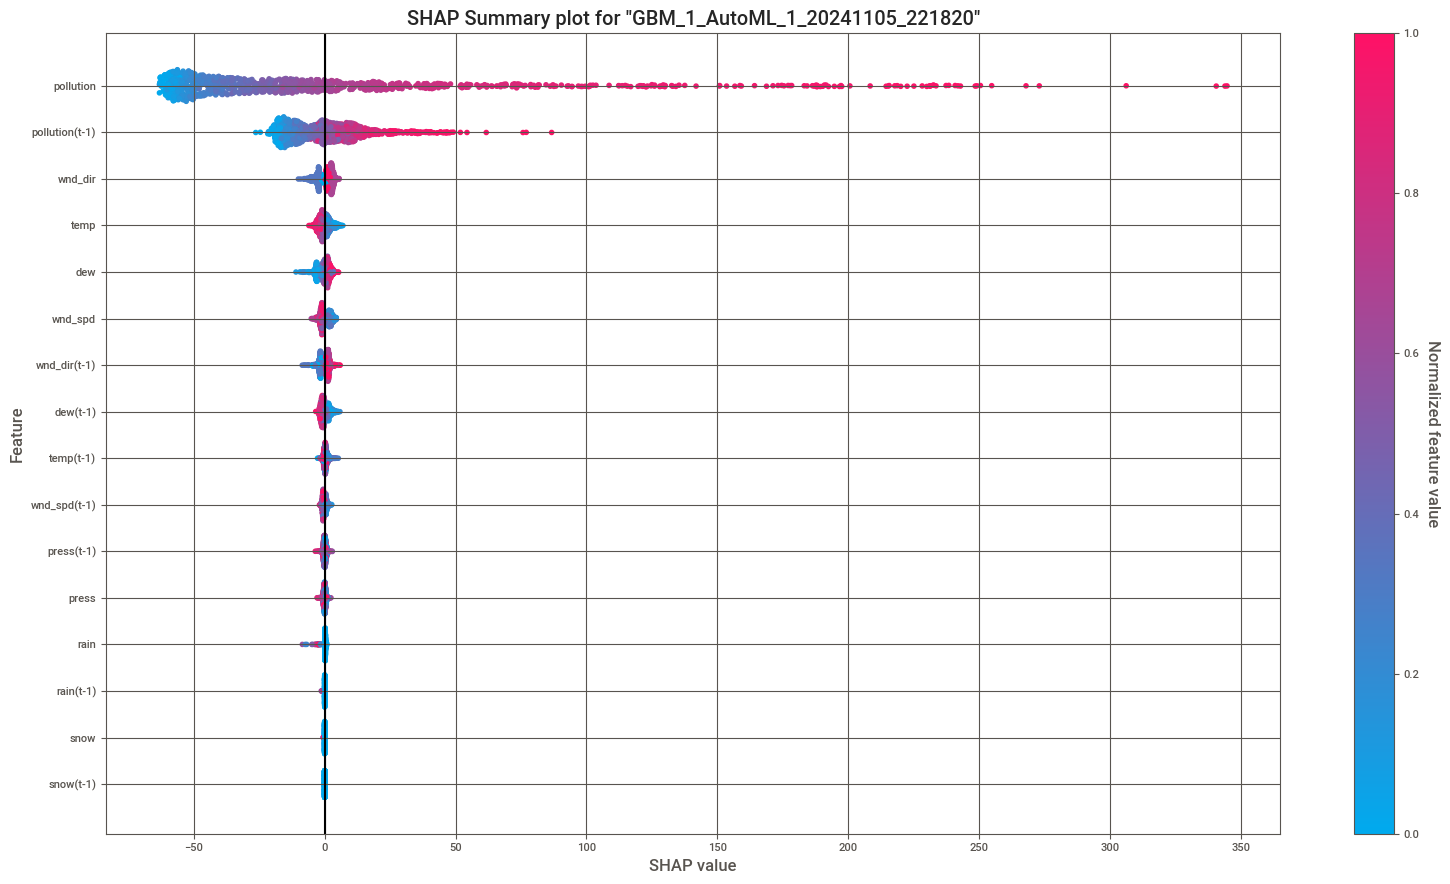

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

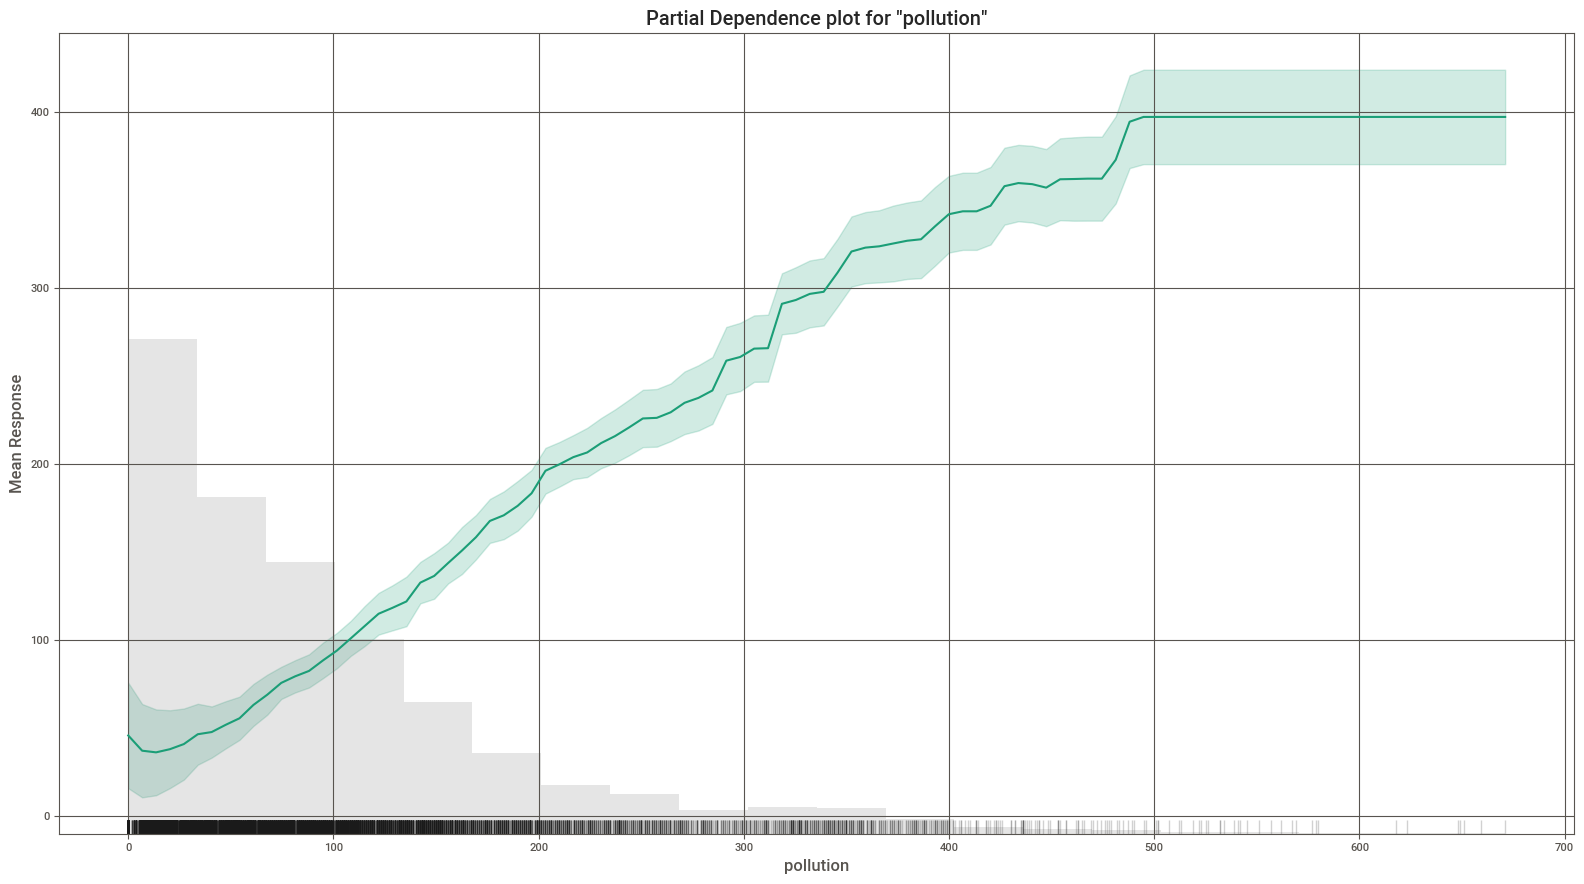

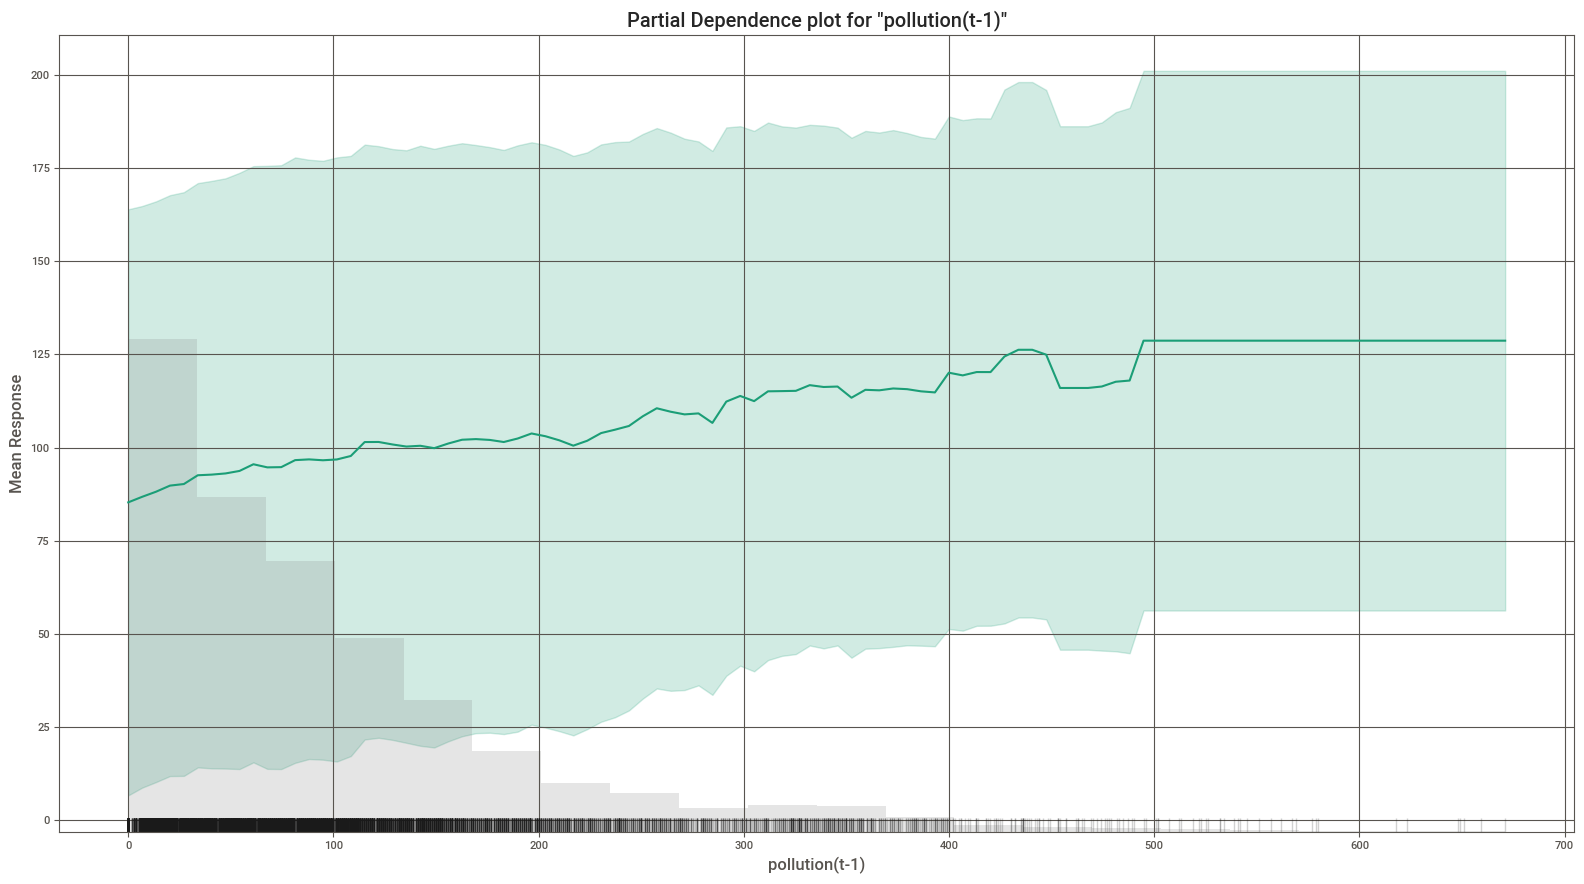

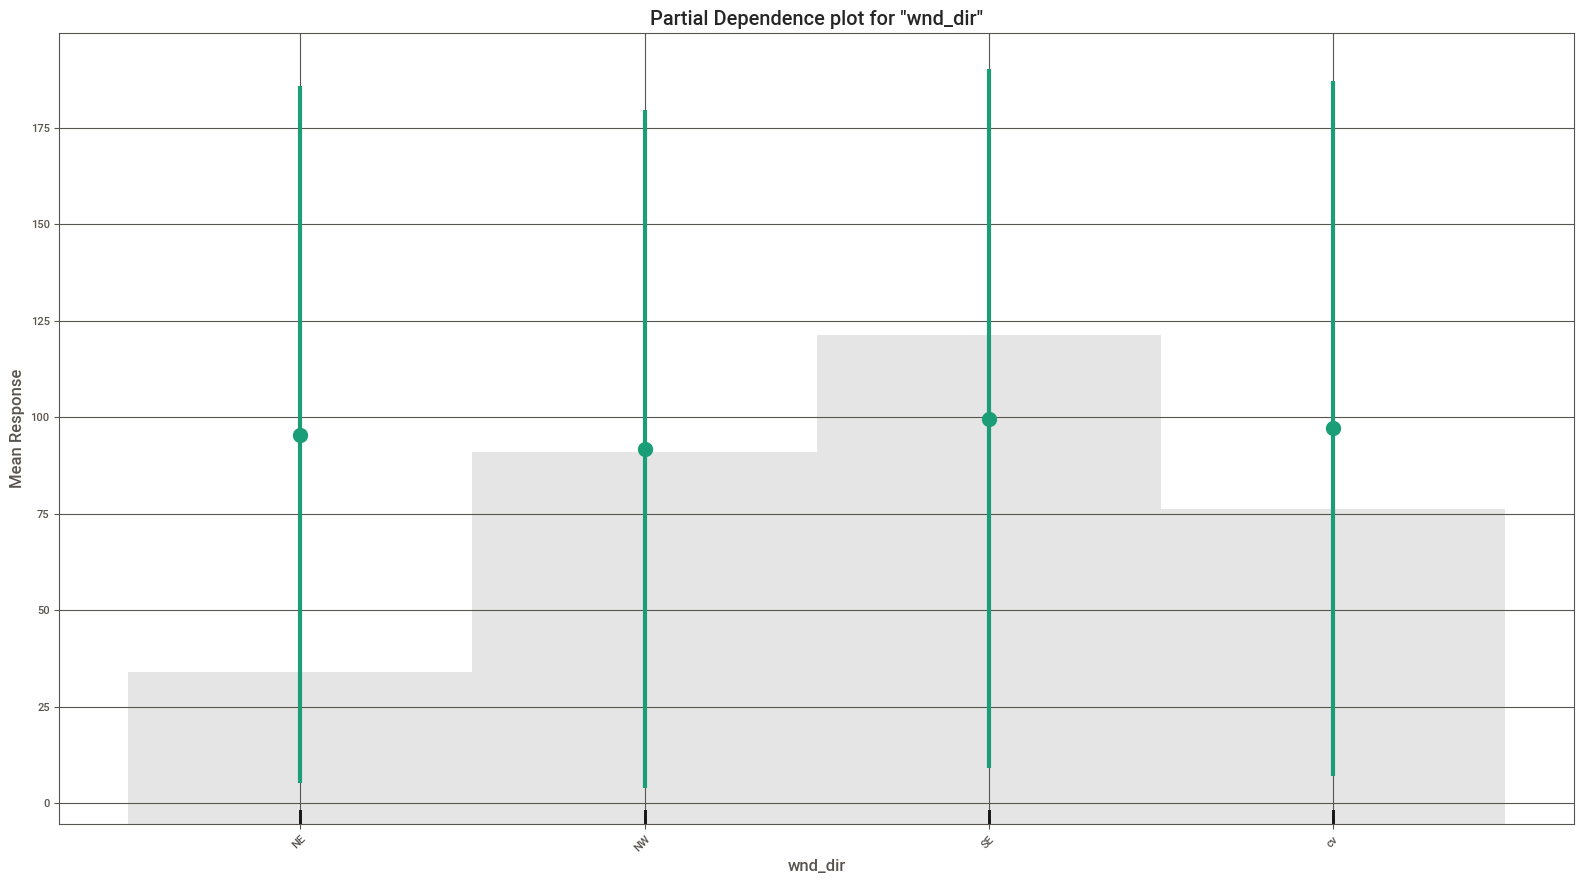

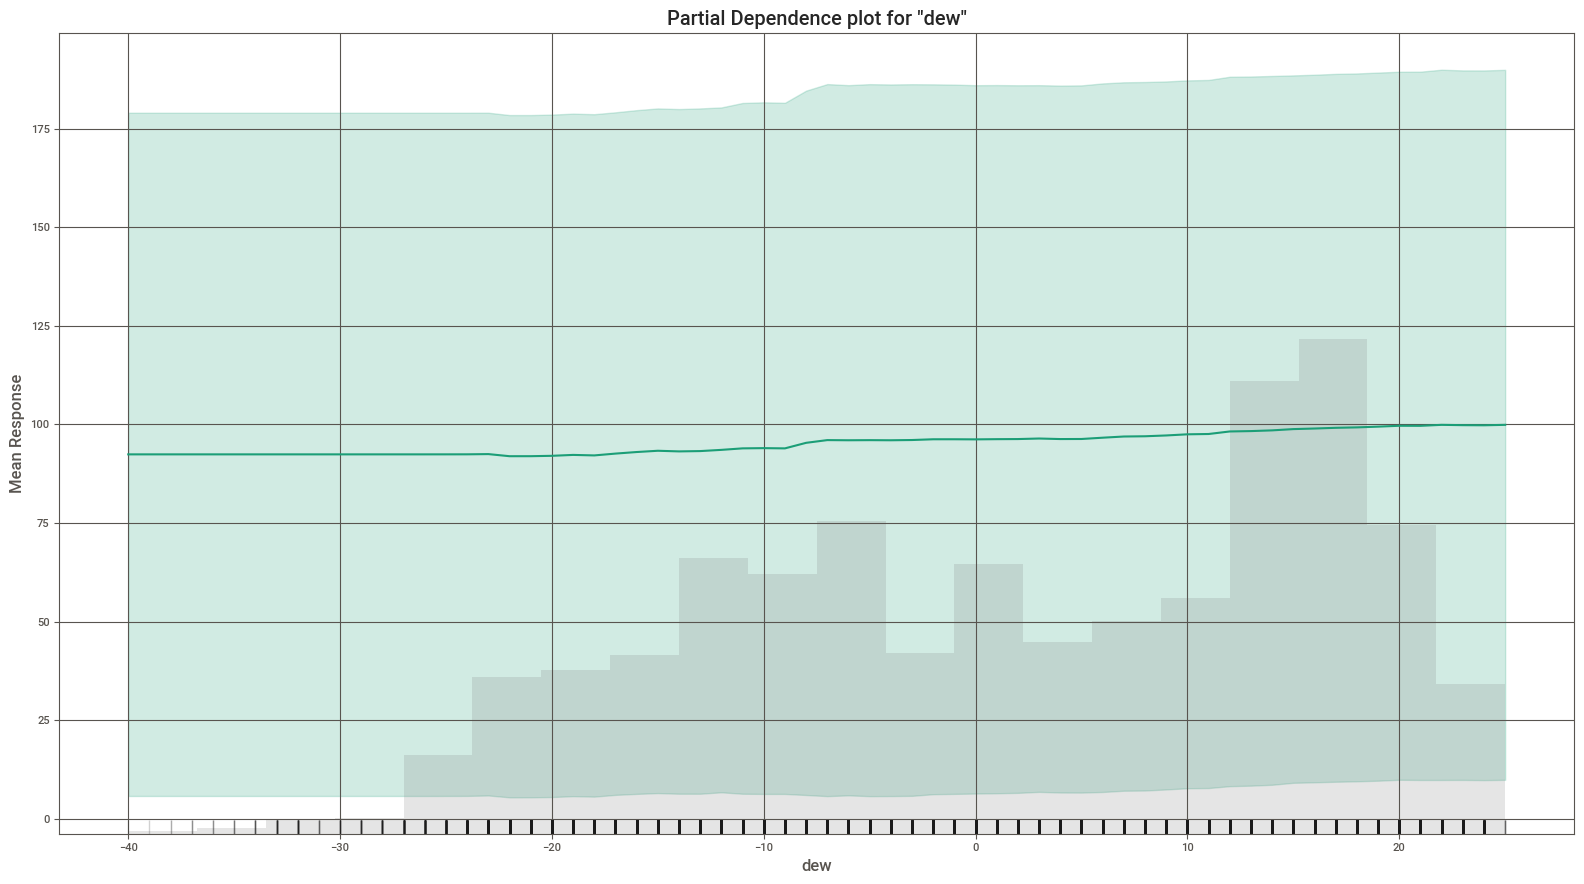

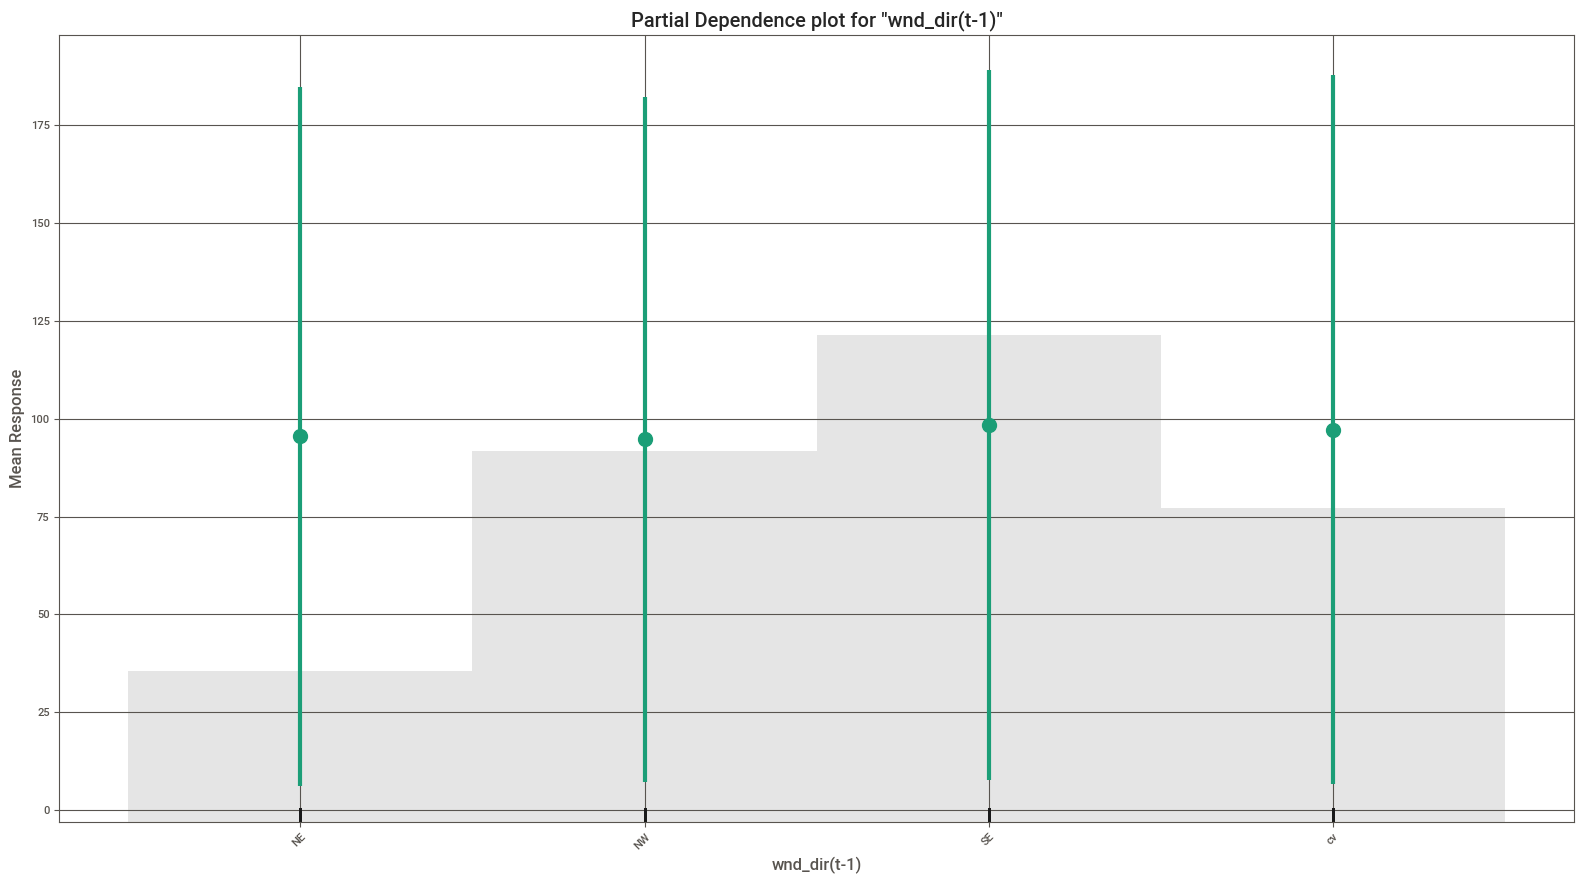

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

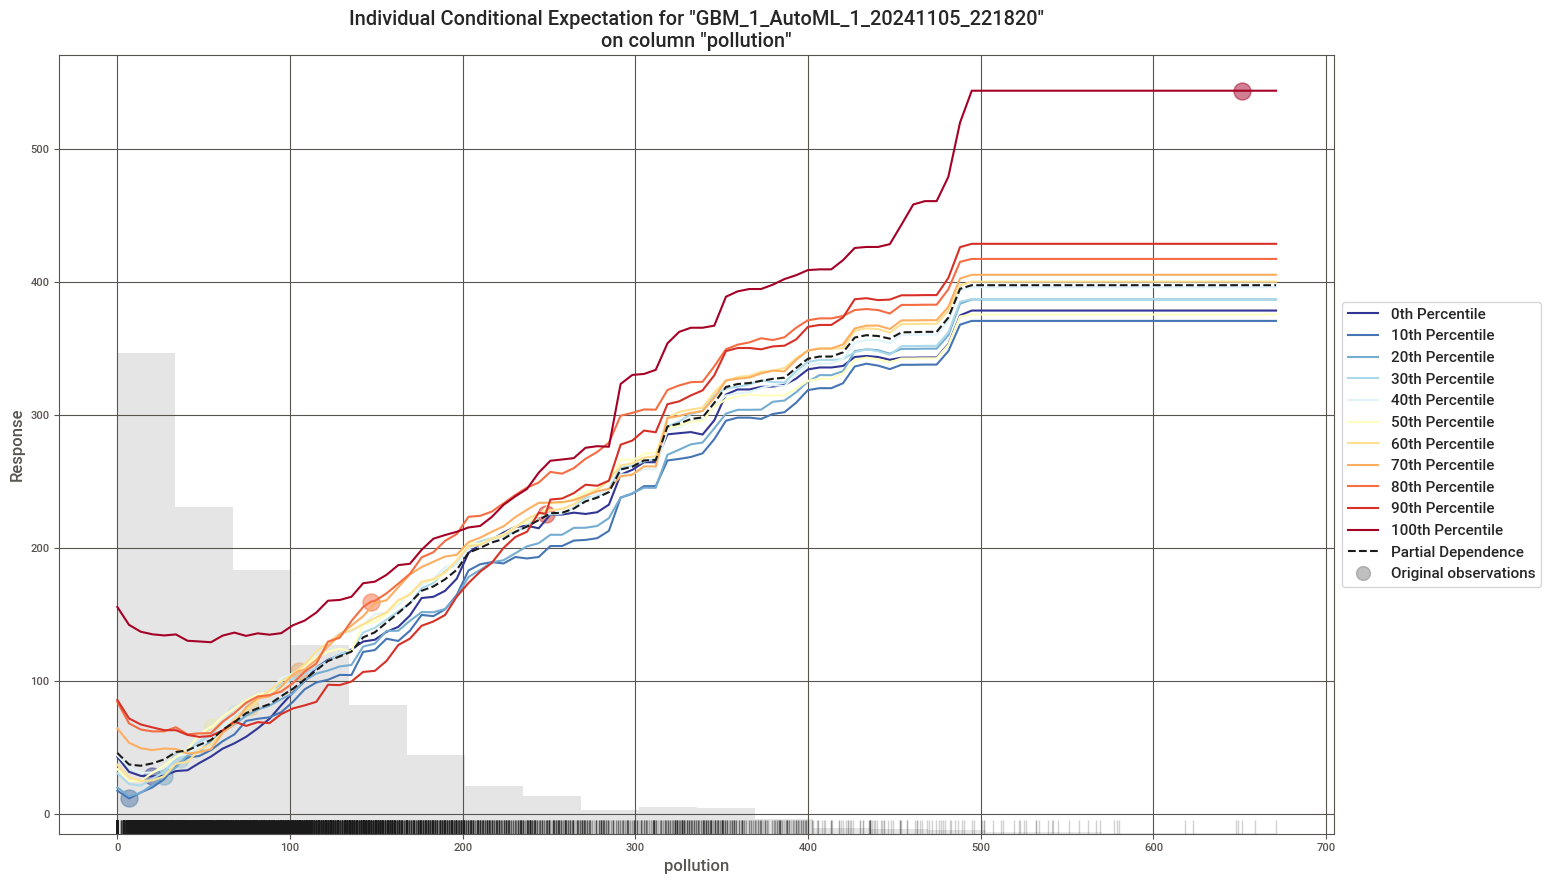

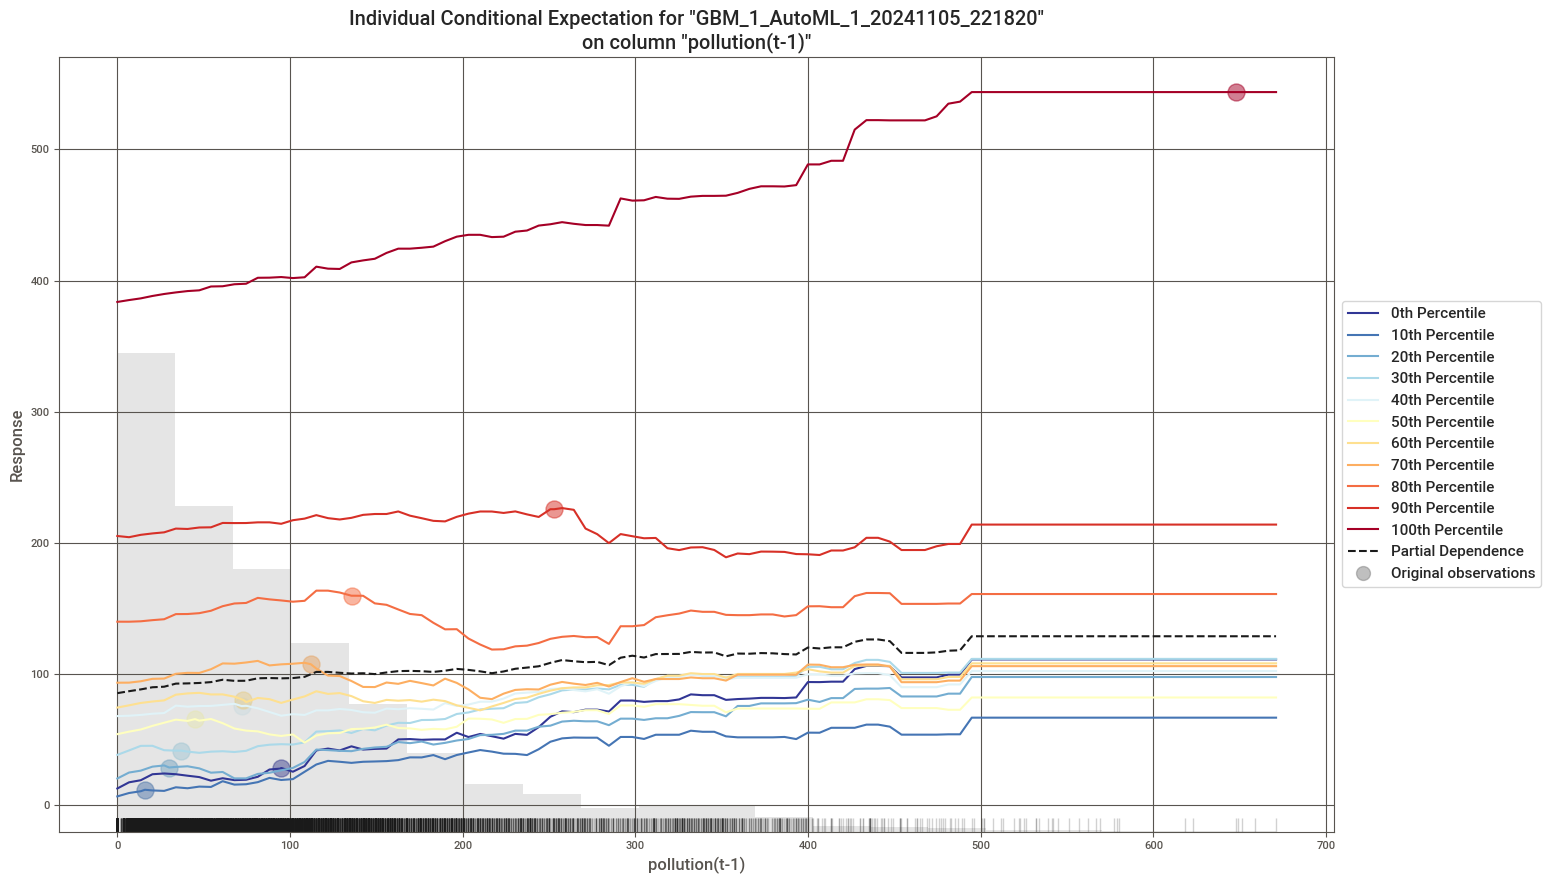

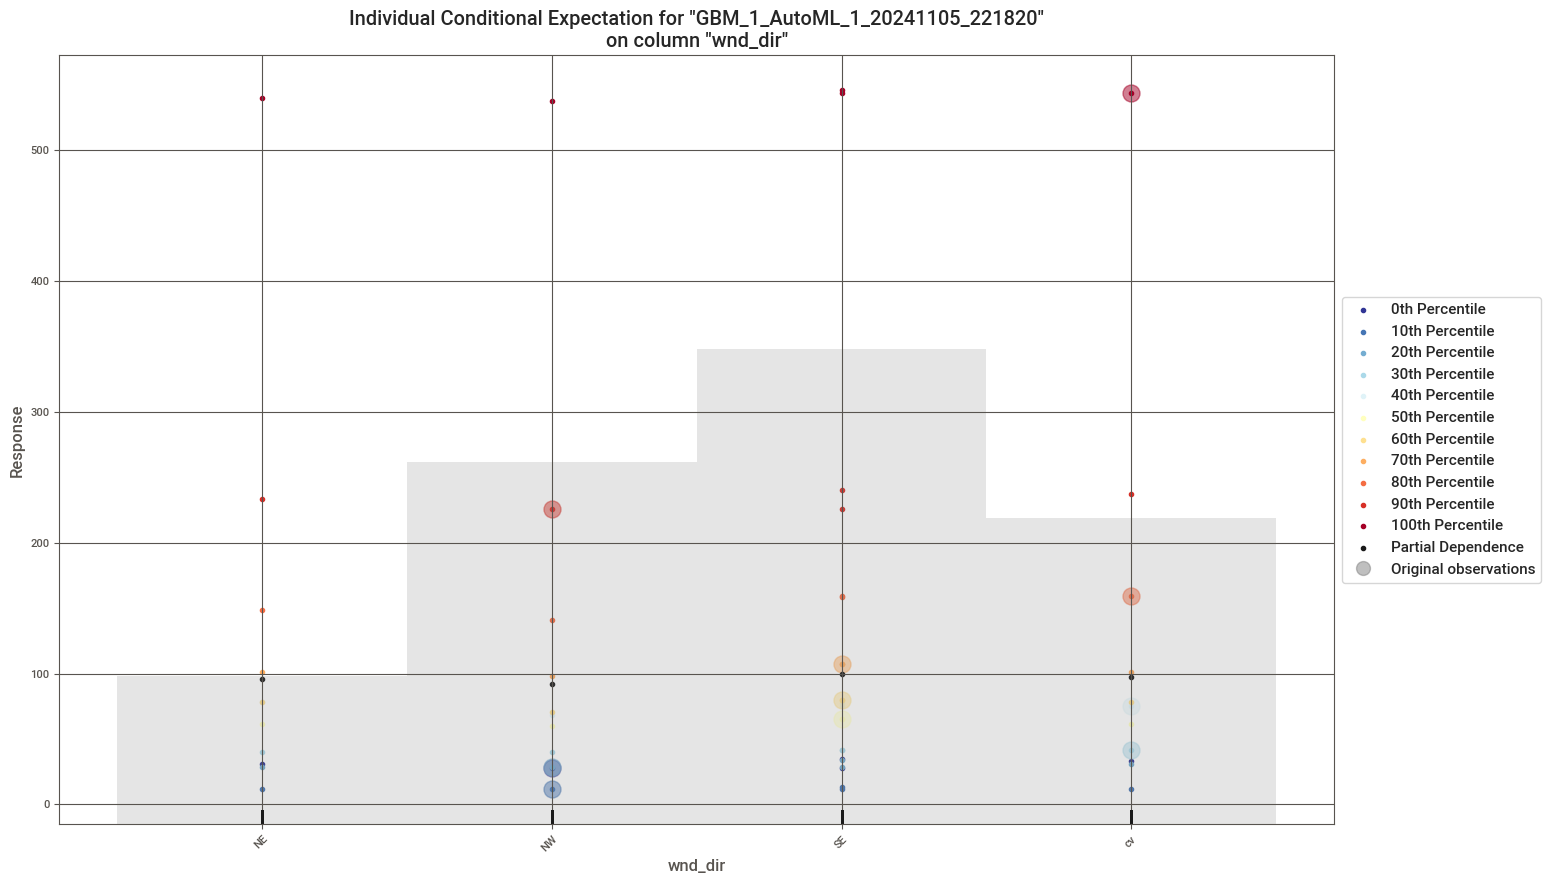

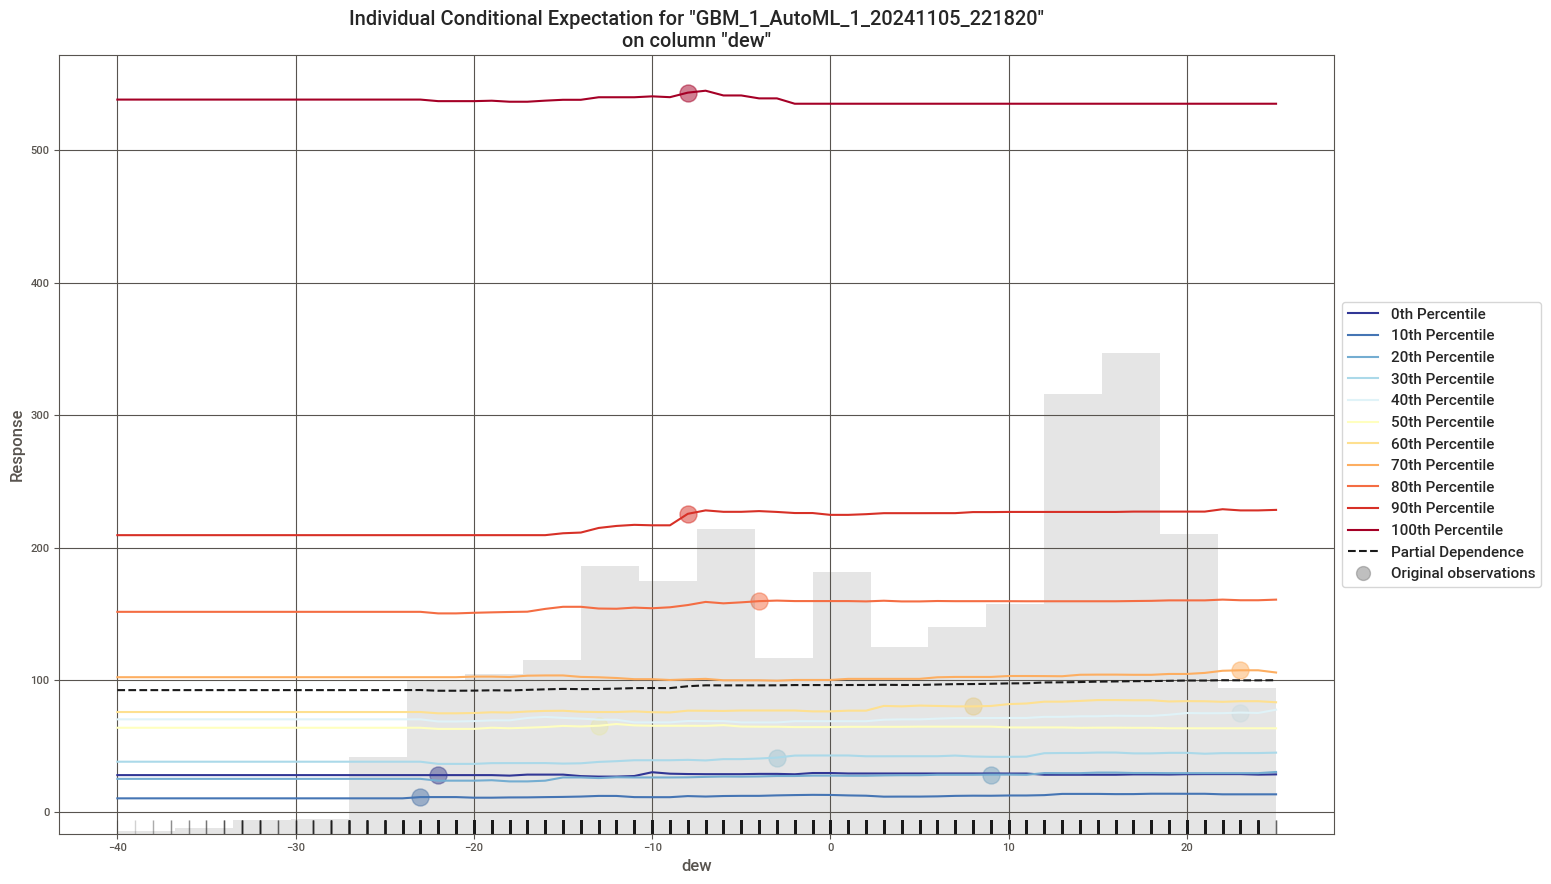

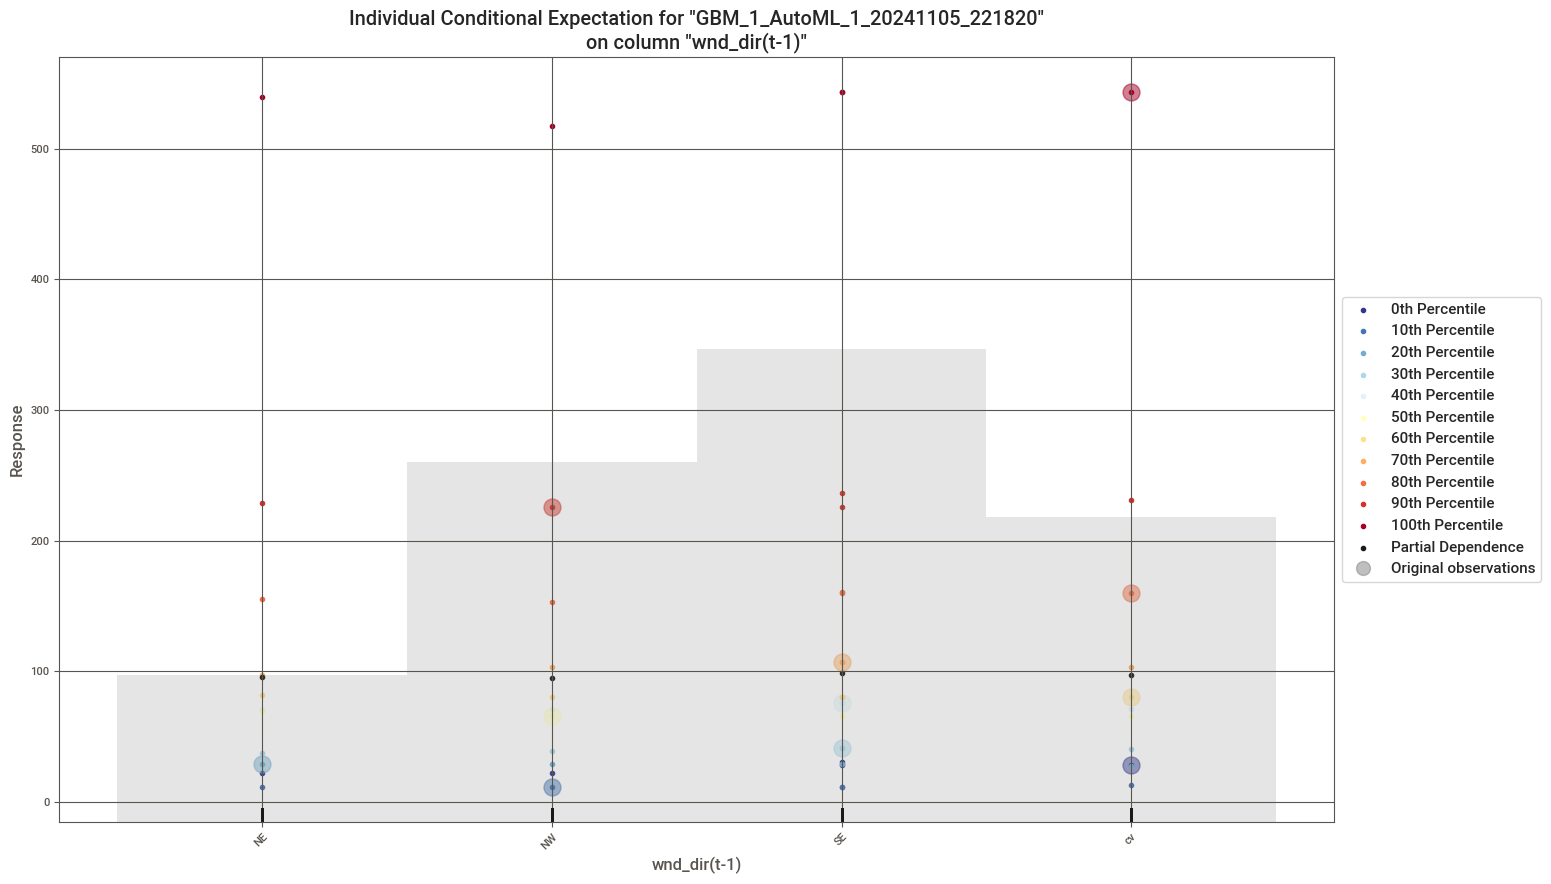

In [ ]:
# Explicación del modelo ganador
exm = aml.leader.explain(hf_test)

[Interpretación de los Gráficos](https://www.analyticsvidhya.com/blog/2021/02/unboxing-h2o-automl-models/)

In [ ]:
# Cálculo del R2
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

R2 =  0.93687162703842


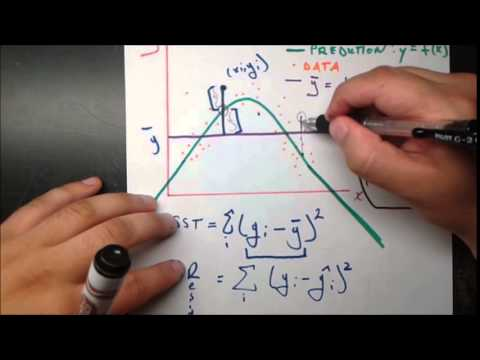

In [ ]:
# Explicación del R2
YouTubeVideo('g2ext963IZg')
# https://www.youtube.com/watch?v=g2ext963IZg

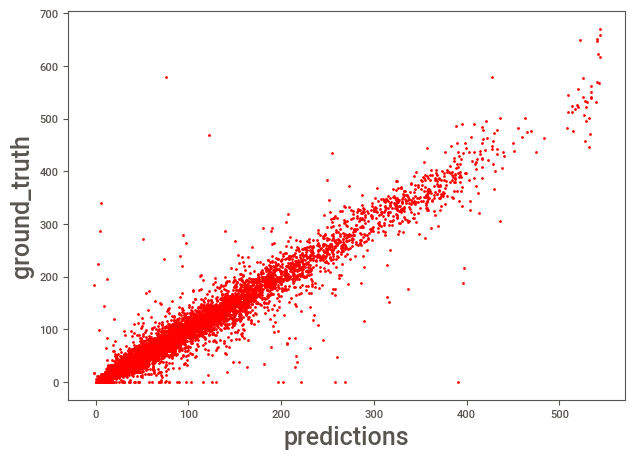

In [ ]:
# Gráfico de dispersión de las predciones y los valores reales
%matplotlib inline

plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1,c='red')
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()

Interpretacion:
 - Si los puntos en el grafico estan alineados a lo largo de la linea diagonal  que se extiende desde la parte inferior izquierda hasta la parte superior derecha significa que las predicciones son muy cercanas a los valores reales. Pero si los puntos se desvian significativamente de esta linea, sugiere que el modelo puede tener problemas de predicción en ciertos rangos de valores.

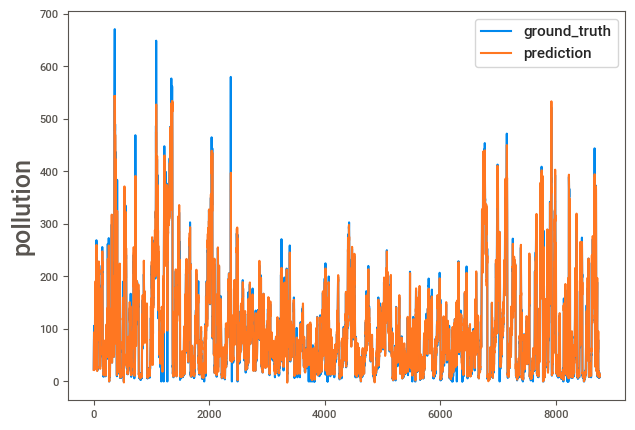

In [ ]:
# Gráfico de las predicciones junto con los valores reales
%matplotlib inline

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('pollution',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()

En este caso usamos la librería H2O. Existen otras librerías de AutoML ([ver artículo para más detalle](https://www.linkedin.com/pulse/top-10-automated-machine-learningauto-ml-tools-used-2020-2021-sahu/?trackingId=wwK1%2FFnjSkSqy%2BDWuM0Q%2Bg%3D%3D)), como así también liberías de AutoML específicas para Series de tiempo como [AutoTS](https://winedarksea.github.io/AutoTS/build/html/index.html).